# Clasificación de Células Sanguíneas
Integrantes: Ken Miyake y Lukas Vasquez Verdejo



En el proceso de diagnóstico de enfermedades, el estudio de la cantidad de células sanguíneas juega un papel importante para determinar factores que explican una enfermedad. En esta tarea, la idea es implementar el modelo de deep-learning más efectivo posible para clasificar células sanguíneas. Las clases de células sanguíneas son: [Eosinophil, Lymphocyte, Monocyte, Neutrophil]


In [ ]:
#Instalamos el paquete gdown para poder descargar el dataset desde el gdrive
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Descargamos el dataset
import gdown
output = 'blood.zip'
gdown.download(id='1CUQjT45tJmqNv_p2HcDkr4Z-IDQEbRg3', output=output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1CUQjT45tJmqNv_p2HcDkr4Z-IDQEbRg3
To: /content/blood.zip
100%|██████████| 105M/105M [00:00<00:00, 120MB/s] 


'blood.zip'

In [ ]:
# Descomprimimos el dataset
!unzip blood.zip
#balancear clases

#CORRER UNA VEZ
#val quedan con 110 images por clase aprox
#test con 500 images por clase aprox
import shutil
import os
for clase in ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']:
  files=os.listdir('images/TEST/'+clase)
  if (clase=='NEUTROPHIL'):br=100-44
  else: br=100

  for f in files[0:br]:
    shutil.move('images/TEST/'+clase+'/'+f, 'images/VAL/'+clase+'/'+f)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: images/TRAIN/MONOCYTE/_0_4446.jpeg  
  inflating: images/TRAIN/MONOCYTE/_0_4528.jpeg  
  inflating: images/TRAIN/MONOCYTE/_0_453.jpeg  
  inflating: images/TRAIN/MONOCYTE/_0_4560.jpeg  
  inflating: images/TRAIN/MONOCYTE/_0_4563.jpeg  
  inflating: images/TRAIN/MONOCYTE/_0_4650.jpeg  
  inflating: images/TRAIN/MONOCYTE/_0_4667.jpeg  
  inflating: images/TRAIN/MONOCYTE/_0_4715.jpeg  
  inflating: images/TRAIN/MONOCYTE/_0_4745.jpeg  
  inflating: images/TRAIN/MONOCYTE/_0_4762.jpeg  
  inflating: images/TRAIN/MONOCYTE/_0_4778.jpeg  
  inflating: images/TRAIN/MONOCYTE/_0_4791.jpeg  
  inflating: images/TRAIN/MONOCYTE/_0_4862.jpeg  
  inflating: images/TRAIN/MONOCYTE/_0_4872.jpeg  
  inflating: images/TRAIN/MONOCYTE/_0_4881.jpeg  
  inflating: images/TRAIN/MONOCYTE/_0_4884.jpeg  
  inflating: images/TRAIN/MONOCYTE/_0_4925.jpeg  
  inflating: images/TRAIN/MONOCYTE/_0_494.jpeg  
  inflating: images/TRAIN/MONOCYTE/

Implementa la mejor red neuronal posible. Tú decides si usas una red creada por ti mismo o si empleas transfer-learning. Entrena la red con los datos en la carpeta "TRAIN" y usa los datos en "VAL" como validación.

Para medir el performance final, realiza las inferencias sobre los datos del conjunto "TEST" y computa el accuracy sobre el conjunto de test. El accuracy es la proporción de imágenes para las cuales la predicción es correcta. IMPORTANTE: el accuracy de test se calcula una sola vez cuando hayas finalizado todos tus experimentos. Para tomar decisiones sobre el modelo y sus hiperparámetros solo puedes usar el conjunto de entrenamiento y validación.

Detalla todos los experimentos que hiciste y cómo llegaste a la mejor red neuronal reportada. Discute los resultados, comparando los distintos experimentos que tomaste en cuenta y responde a la pregunta: Porqué tu modelo final fue el mejor de todo lo que probaste?

IMPORTANTE: Evita el overfitting a toda costa. Un modelo con overfitting es aquel que durante el entrenamiento las curvas de loss/accuracy para datos de entrenamiento y validación se separan considerablemente.

Éxitos!

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
import time
import os
import copy
from torchvision.io import read_image
from PIL import Image




In [ ]:
class BloodCellsDataset(torch.utils.data.Dataset):
  def __init__(self, root, split, transform):
    self.root = root
    self.split = split
    self.transform = transform
    self.class2idx = dict()

    self.class2idx['EOSINOPHIL'] = 0
    self.class2idx['LYMPHOCYTE'] = 1
    self.class2idx['MONOCYTE'] = 2
    self.class2idx['NEUTROPHIL'] = 3

    self.classes = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']
    #dataset_file = os.path.join(self.root, f'{self.split}_split_v3.txt')

    self.images=[]
    self.labels=[]
    self.distribucion=[]
    for clase in self.classes:
      numero=0
      input_images_path = os.path.join(self.root,f'{self.split}/{clase}')
      files_names = sorted(os.listdir(input_images_path))
      for file_name in files_names:
        self.images.append(file_name)
        self.labels.append(clase)
        numero=numero+1
      self.distribucion.append(numero)


def __len__(self):
    return len(self.images)

def __getitem__(self, idx):
  image_path = os.path.join(self.root, self.split, self.labels[idx],self.images[idx])
  image = Image.open(image_path)
  label = self.class2idx[self.labels[idx]]
  im = image.convert('RGB')
  if self.transform:
    image = self.transform(im)

  return image, label





In [ ]:


train_dataset = BloodCellsDataset(root='images/', split='TRAIN',
                                                transform=transforms.Compose([
                                                    transforms.RandomResizedCrop(224),
                                                    transforms. ToTensor(),
                                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                                        std=[0.229, 0.224, 0.225])
                                                ]))
test_dataset = BloodCellsDataset(root='images/', split = 'TEST',
                                              transform=transforms.Compose([
                                                    transforms.Resize(256),
                                                    transforms.CenterCrop(224),
                                                    transforms. ToTensor(),
                                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                                         std=[0.229, 0.224, 0.225])
                                                ]))

val_dataset = BloodCellsDataset(root='images/', split = 'VAL',
                                              transform=transforms.Compose([
                                                    transforms.Resize(256),
                                                    transforms.CenterCrop(224),
                                                    transforms. ToTensor(),
                                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                                         std=[0.229, 0.224, 0.225])
                                                ]))



In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader= torch.utils.data.DataLoader(test_dataset, batch_size=256, shuffle=True)
val_loader= torch.utils.data.DataLoader(val_dataset, batch_size=256, shuffle=True)

class_names = train_dataset.classes

def imshow(inp, title = None):
  plt.figure(figsize=(10,20))
  inp = inp.numpy().transpose((1, 2, 0))
  mean = np.array([0.5])
  std = np.array([0.5])
  inp = std * inp + mean
  inp = np.clip(inp, 0, 1)
  plt.imshow(inp)

  if title is not None:
    plt.title(title)
  plt.pause(0.001)

inputs, classes = next(iter(train_loader))
out = torchvision.utils.make_grid(inputs)

#imshow(out, title=[class_names[x] for x in classes])

device = ('cuda' if torch.cuda.is_available() else 'cpu')


In [ ]:
img = train_dataset[7][0]
inp = img.numpy().transpose((1, 2, 0))
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
inp = std * inp + mean
inp = np.clip(inp, 0, 1)


plt.figure()
plt.imshow(inp.squeeze())
plt.show()

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs = 25):
  since = time.time()

  best_model_wts = copy.deepcopy(model.state_dict())
  best_acc = 0.0

  for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch, num_epochs-1))
    print('-' * 10)

    #Train model
    scheduler.step()
    model.train()

    running_loss = 0.0
    running_corrects = 0.0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss /len(train_dataset)
    epoch_acc = running_corrects.double() / len(train_dataset)

    print('Train Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))

    #Validation
    model.eval()
    running_loss = 0.0
    running_corrects = 0.0

    for inputs, labels in test_loader:
      inputs = inputs.to(device)
      labels = labels.to(device)

      with torch.set_grad_enabled(False):
        outputs = model(inputs)

        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

      running_loss += loss.item() * inputs.size(0)
      running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss /len(test_dataset)
    epoch_acc = running_corrects.double() / len(test_dataset)

    print('Val Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))

    if epoch_acc > best_acc:
        best_acc = epoch_acc
        best_model_wts = copy.deepcopy(model.state_dict())

  time_elapsed = time.time() - since
  print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed//60, time_elapsed % 60))
  print('Best val accucary: {:.4f}'.format(best_acc))

  model.load_state_dict(best_model_wts)
  return model


In [ ]:
def visualize_model(model, num_images = 6):
  was_training = model.training
  model.eval()
  images_so_far = 0
  fig = plt.figure()

  with torch.no_grad():
    for i, (inputs, labels) in enumerate(test_loader):
      inputs = inputs.to(device)
      labels = labels.to(device)

      outputs = model(inputs)
      _, preds = torch.max(outputs, 1)

      for j in range(inputs.size()[0]):
        images_so_far +=1
        ax = plt.subplot(num_images//2, 2, images_so_far)
        ax.axis('off')
        ax.set_title('predicted: {}'.format(class_names[preds[j]]))
        imshow(inputs.cpu().data[j])

        if images_so_far == num_images:
          model.train(mode=was_training)
          return
    model.train(mode = was_training)




#<b><u>Introducción</u></b>

El siguiente trabajo tiene por objetivo  encontrar el mejor modelo posible para la  clasificación de  células sanguíneas. Las clases de células sanguíneas son: [Eosinophil, Lymphocyte, Monocyte, Neutrophil].

Dado que el análisis de imágenes es una tarea de alta complejidad debido a la gran cantidad de datos  asociados y al uso de redes profundas para obtener un buen desempeño,la metodología elegida para abordar el problema fue transfer learning, es decir tomaremos diferentes redes pre-entrenadas com punto inicial para abordar nuestro problema.A continuación realizaremos una serie de experimentos con el objetivo de encontrar la mejor arquitectura y método de optimización para resolver el problema.A partir de estos, descartaremos ciertas metodologías y seleccionaremos  un conjunto de las mejores para nuestro modelo final.El código de los experimentos pueden revisarse en el siguiente [link](https://colab.research.google.com/drive/1T4ZeWTZrPMpeXrVZ6N6yB8IUCwzWy_l9#scrollTo=QTMLWoOR1Rq7).

En este otro [notebook](https://colab.research.google.com/drive/17J4KotDS257S3ut7jq4YblggxUXWwPE-?usp=sharing) se encuentran parte de los experimentos principales realizados de manera pseudoaleatoria con resultados consistentes (mediante el uso de semillas).

Notar que los datos en las distintas carpetas (TRAIN/VALIDATION/TEST) no se encuentran distribuidos de la misma forma, por lo que se realiza un balance en la carpeta VAL. Los datos quedan distribuidos de la siguiente manera:

In [ ]:

print(train_dataset.distribucion)
print(test_dataset.distribucion)
print(val_dataset.distribucion)

[2497, 2483, 2478, 2499]
[523, 520, 520, 568]
[113, 106, 104, 104]


#<b><u>Experimento 1:Fine tuning vs Freeze</u></b>

Existen 2 aproximaciones diferentes para realizar Transfer learning.Se tiene por un lado el “fine-tuning ” que consiste en tomar los pesos de un modelo pre-entrenado y ocuparlos como inicialización para un nuevo modelo,y por otro lado se el “freezing” el cual consiste en congelar los pesos de las primeras capas de la red con el objetivo de mantener su capacidad  de capturar  ciertas características de las imagenes. El primer experimento tiene por objetivo comparar el desempeño de acuerdo a estas dos aproximaciones.
Para eso se entrenaron  los modelos resnet18 y alexnet usando las metodologias fine-tuning y freeze en 25 épocas . Los resultados obtenidos fueron los siguientes:



\begin{array}{|c|c|c|c|c|} \hline
Red & val-acc_{epoch0} & val-acc_{epoch12} & val-acc_{epoch24}&val-acc_{best} \\ \hline
AlexNet (fine-tuning) & 0.7744  & 0.8014 & 0.7973& 0.8058 \\
ResNet (fine-tuning)    & 0.7953 & 0.8102  & 0.8219&0.8520\\ \hline   
AlexNet (freeze) & 0.3789 & 0.5287 & 0.5283& 0.5404 \\
ResNet18 (freeze)&  0.3651 &  0.5846 & 0.5871& 0.5895 \\ \hline
\end{array}


Se puede apreciar que tanto para resnet18 y alexnet usando freeze, lo resultados obtenidos no superan el 60% accuracy en validación, en cambio, los resultados obtenidos haciendo uso de fine-tuning son bastante superiores, esto podría significar que existen muchas diferencias en los tipos de características que se pueden encontrar en el dataset imagenet en comparación a el dataset médico que se está estudiando, por lo que es necesario que el “extractor de características” (parte CNN del modelo) se adapte al dataset que se quiere estudiar.


#<b><u>Experimento 2:Método de optimización</u></b>

A continuación se pondrán a prueba diferentes métodos de optimización ante una misma red.Los Algoritmos de optimización a utilizar son Adam, SGD con momentum ,RMSprop.Se entrenó la red Alexnet con los métodos de optimización  en 25 épocas.Los resultados obtenidos fueron los siguientes:

\begin{array}{|c|c|c|c|c|} \hline
Red & val-acc_{epoch0} & val-acc_{epoch12} & val-acc_{epoch24}&val-acc_{best} \\ \hline
AlexNet (SGD) & 0.5293  & 0.7732
 & 0.7963& 0.7986 \\
AlexNet (ADAM) &  0.5192 & 0.8215 & 0.8235& 0.8267 \\
AlexNet(RMSprop)& 0.3036 & 0.6795 & 0.7065& 0.7089  \\ \hline
\end{array}






Se puede apreciar que el método de optimización que entrega mejores resultados es ADAM por sobre SGD  y RMSprop.

#<b><u>Experimento 3:Comparación de Redes</u></b>


El tercer experimento tiene por objetivo obtener una comparativa entre las diferentes  arquitecturas de redes a utilizar en nuestro problema.Para este experimento se comparó la performance de los modelos AlexNet,GoogleNet y ResNet (con fine-tuning y ADAM) en 25 épocas.

\begin{array}{|c|c|c|c|c|} \hline
Red & val-acc_{epoch0} & val-acc_{epoch12} & val-acc_{epoch24}&val-acc_{best} \\ \hline
AlexNet &  0.5192 & 0.8215 & 0.8235& 0.8267  \\
ResNet & 0.7511 &  0.8528 & 0.8540& 0.8544 \\  
GoolgeNet & 0.7939 &  0.8618 &0.8595& 0.8782 \\   \hline
\end{array}


#<b><u>Detalle Mejores modelos:Resnet-GoolgeNet</u></b>
Si tomamos  los mejores resultados obtenidos en los experimentos 1, 2 y 3 podemos construir un modelo con alto rendimiento.Este modelo corresponde a
ResNet con fine-tuning y optimizado con ADAM.

\begin{array}{|c|c|c|c|c|} \hline
ResNet & val-acc_{epoch0} & val-acc_{epoch12} & val-acc_{epoch24}&val-acc_{best} \\ \hline
   & 0.7953 &  0.8259 & 0.8219& 0.8520 \\ \hline
   & train-acc_{epoch0} & train-acc_{epoch12} & train-acc_{epoch24}&train-acc_{best}\\ \hline
   & 0.7526 &  0.9594&  0.9687&0.9708\\ \hline   
\end{array}

\begin{array}{|c|c|c|c|c|} \hline
GoogleNet & val-acc_{epoch0} & val-acc_{epoch12} & val-acc_{epoch24}&val-acc_{best} \\ \hline
  & 0.8207 &  0.8818 & 0.8778& 0.8826 \\   \hline   & train-acc_{epoch0} & train-acc_{epoch12} & train-acc_{epoch24}&train-acc_{best}\\ \hline
   & 0.5580 &  0.9494&  0.9439&0.9494\\ \hline   
\end{array}


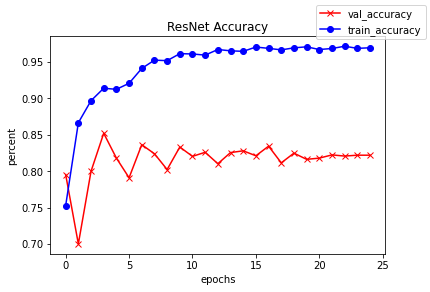

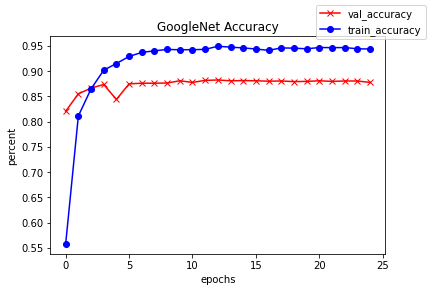

In [ ]:
import matplotlib.pyplot as plt
epochs=[i for i in range(25)]
val_accuracy=[ 0.7953,0.7000,0.7998,0.8520,0.8179,0.7909,0.8363,0.8239,0.8022,0.8331,0.8203,0.8259,0.8102,0.8255,
              0.8279,0.8211,0.8343, 0.8114,0.8247,0.8162,0.8179,0.8223,0.8207,0.8219,0.8219]

train_accuracy=[0.7526,0.8665,0.8968,0.9139,0.9124,0.9207,0.9411,0.9525,0.9518,0.9614, 0.9610,0.9594,0.9671,0.9653,
                0.9646,0.9705,0.9687,0.9666,0.9694,0.9708,0.9671,0.9685,0.9716,0.9687,0.9695]
fig,ax=plt.subplots()
ax.plot(epochs, val_accuracy, 'red',marker='x')
ax.plot(epochs, train_accuracy,'blue', marker='o')

ax.set_title("ResNet Accuracy")
ax.set_ylabel("percent")
ax.set_xlabel("epochs")
fig.legend(['val_accuracy','train_accuracy'])



val_accuracy=[0.8207,0.8552,0.8665,0.8737,0.8440,0.8749,0.8762,0.8762,0.8766,0.8810,0.8778,0.8818,0.8826,0.8810,0.8814,0.8810
              ,0.8802,0.8806,0.8794,0.8798,0.8810,0.8798,0.8806,0.8806,0.8778 ]

train_accuracy=[0.5580,0.8113,0.8649,0.9020,0.9152,0.9292,0.9372,0.9403,0.9431,0.9424,0.9426,0.9432,0.9494,0.9476,0.9461,0.9439,
                0.9413,0.9461,0.9456,0.9443,0.9469,0.9466,0.9468,0.9444,0.9439]


fig,ax=plt.subplots()
ax.plot(epochs, val_accuracy, 'red',marker='x')
ax.plot(epochs, train_accuracy,'blue', marker='o')


ax.set_title("GoogleNet Accuracy")
ax.set_ylabel("percent")
ax.set_xlabel("epochs")
fig.legend(['val_accuracy','train_accuracy'])



Los modelos GoogleNet y Resnet son los que obtienen mejores resultados.Si bien muestran una gran performance, se puede apreciar para el caso de ResNet una  gran diferencia entre sus accuracies de train  y   validación (96% de accuracy en train, 85% accuracy de validación), esto es una clara señal de overfitting.A pesar de que se tiene  un mejor accuracy de  validación por parte de GoogleNet (88%) ResNet presenta un mayor Train accuracy (96%). Este hecho nos hace creer que ResNet tiene una gran capacidad de aprendizaje la cual puede aprovecharse con técnicas de Data Augmentation.La estrategia en adelante será disminuir la brecha entre accuracy de Train  y  Validación para ResNet (también se intentará con Google Net).


#<b><u>Experimento 4:Data Augmentation</u></b>

Para hacer data augmentation se tuvo que redefinir la clase BloodCellsDataset
de manera tal que se creen nuevas imágenes a partir de los datos en TRAIN pero con  algunas transformaciones (flip horizontal, flip vertical, rotaciones).Al agregar 800 nuevas imágenes  no se obtuvieron mejores resultados.Notar que al aumentar la cantidad  de datos de TRAIN también aumenta el tiempo  de entrenamiento,por esta misma razón se redujo la cantidad de épocas de entrenamiento a 15 ( en la cual  los modelos ya evidencian un estancamiento).Ya con el doble de  imágenes (+2500 aprox por clase) se obtuvieron  best val accuracy sobre el 90% para ResNet   y GoogleNet.Los resultados obtenidos fueron los siguientes:

\begin{array}{|c|c|c|c|c|} \hline
ResNet_{+2500img} & val-acc_{epoch0} & val-acc_{epoch7} & val-acc_{epoch14}&val-acc_{best} \\ \hline
  & 0.8451 &  0.9014 & 0.9014& 0.9155 \\   \hline   & train-acc_{epoch0} & train-acc_{epoch12} & train-acc_{epoch24}&train-acc_{best}\\ \hline
   & 0.8001 &  0.9633&  0.9750&0.9750\\ \hline   
\end{array}
   
\begin{array}{|c|c|c|c|c|} \hline
GoogleNet_{+2500img} & val-acc_{epoch0} & val-acc_{epoch12} & val-acc_{epoch24}&val-acc_{best} \\ \hline
& 0.8592 &   0.8732 & 0.8873&  0.9296\\ \hline
   & train-acc_{epoch0} & train-acc_{epoch12} & train-acc_{epoch24}&train-acc_{best}\\ \hline
   & 0.7825 &  0.9743&  0.9804& 0.9804 \\ \hline   
\end{array}



Notar que al generar más datos de entrenamiento GoogleNet alcanza un mayor val accuracy que ResNet, sin embargo también aumenta  su train  accuracy.Es por esta razón que consideraremos como modelo final a ResNet, pues  este también  incrementa su accuracy de validación pero a la vez mantiene  su accuracy de train (es decir, se reduce el overfitting), por lo que  creemos  que se evidencia de mejor manera los beneficios de usar data augmentation.


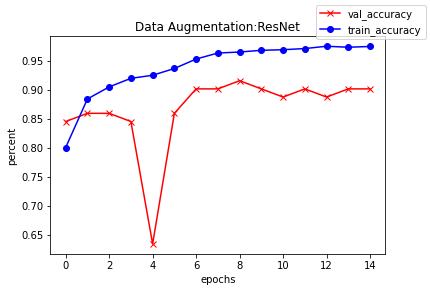

In [ ]:
import matplotlib.pyplot as plt
epochs=[i for i in range(15)]
val_accuracy=[ 0.8451, 0.8592, 0.8592, 0.8451,0.6338,0.8592, 0.9014,0.9014,0.9155,0.9014,0.8873, 0.9014,0.8873, 0.9014,0.9014]
train_accuracy=[ 0.8001, 0.8840,0.9048,0.9196,0.9249, 0.9366, 0.9529,0.9633,0.9650,0.9680,0.9690,0.9710,0.9750,0.9733,0.9746]

fig,ax=plt.subplots()
ax.plot(epochs, val_accuracy, 'red',marker='x')
ax.plot(epochs, train_accuracy,'blue', marker='o')

ax.set_title("Data Augmentation:ResNet")
ax.set_ylabel("percent")
ax.set_xlabel("epochs")
fig.legend(['val_accuracy','train_accuracy'])



**
Para obtener estos resultados  se realizó una gran cantidad de pruebas diferentes siguiendo la metodología de data augmentation (se alternaron las transformaciones , número de épocas y la cantidad de samples).En el presente  se muestran los mejores resultados, sin embargo  estos estaban determinados  en gran parte por la aleatoriedad  de la operación, en otras palabras al correr el experimento  varias veces se obtienen diferentes resultados.Posteriormente se hizo uso de una semilla pero nos fué difícil alcanzar  este performance nuevamente (para Resnet se superó varias veces el accuracy de 85% inicial , sin embargo  no se logró superar la barrera de los 90%).
**


#<b><u>Conclusiones</u></b>

En el presente trabajo se experimentó con distintos modelos de redes convolucionales pre entrenadas mediante el uso de transfer learning,  , en particular, se usaron dos técnicas: Freezing y Fine Tuning, las cuales corresponden a entrenar solo la capa MLP de un modelo y entrenar un par de épocas al modelo completo, respectivamente. Se observó que, cuando se hizo uso de freezing los resultados fueron bastante malos, esto fue un indicio de que los datos con los que la red original fue entrenada eran muy distintos a los datos usados en este trabajo(dataset médico) y que, por ende, el extractor de características de la red inicial no era capaz de obtener, valga la redundancia, las características que definen a una clase. En consecuencia, se experimentó con la técnica “Fine-tuning”, y así, adaptar el extractor de características a los datos con los que se quiere trabajar. Los resultados fueron bastante superiores a los obtenidos mediante freezing, no obstante tampoco fueron buenos, esto debido al overfitting.

Finalmente, en búsqueda de una solución del problema anterior, se experimentó usando la técnica de data augmentation, esto es, aumentar la cantidad de imágenes en el dataset copiando imágenes y aplicando a estas transformaciones ligeramente aleatorias, esto permite “molestar” al modelo para que no “memorice” los datos de entrenamiento y así adquirir la capacidad de generalizar mejor. Se eligieron los modelos que tuvieron mejor performance cuando se experimentó con fine-tuning, estos fueron resnet 18 y google_net. Los resultados obtenidos fueron ligeramente satisfactorios, se logró disminuir el overfitting en los dos modelos, pero no se pudo eliminar completamente. El modelo que obtuvo mejores resultados fue google net ( aunque resnet tuvo mejora superior con respecto a cuando no se usó data augmentation), una posible explicación a estos resultados podría ser que al tener resnet más potencia, tiende a memorizar los datos en comparación a google.
 Otra razón que podría explicar la tendencia al overfitting de los modelos es que los datos de validación se encuentran todos muy cerca de la frontera de decisión entre clases ( en este caso: discernir entre un linfocito y un neutrófilo muy parecidos), por lo que, los modelos, al aprender demasiado bien los datos de train, tienden a perder la capacidad de generalizar en validación.Esta delgada frontera de decisión  también puede explicar los comportamientos oscilantes  en ResNet  (ver gráfico  en Sección Data Augmentation),el modelo al no poder decidir  entre las diferentes clases genera comportamientos disímiles a lo largo  de la validación.
Un experimento interesante podría ser aumentar considerablemente la cantidad de datos mediante el uso de data augmentation, bajo la hipótesis que podría disminuir el overfitting y mejorar el performance de la red debido a una mejor capacidad de generalización. Otro experimento posible podría ser el uso de modelos preentrenados con otro tipo de dataset, como, por ejemplo, con datos médicos, esto podría mejorar bastante los resultados, ya que el extractor de características sería más especifico para el dataset estudiado en este trabajo.

